Функции для работы со сгенерированными/введенными функциями (функции в данной программе задаются матрицами)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg

grad_counter = 0
func_counter = 0

def f(x, A):
    global func_counter
    func_counter += 1
    if (type(x[0]) is np.ndarray):
        result = 0
        for i in range(len(A)):
            for k in range(len(A)):
                result += A[i, k] * x[i] * x[k]
        return result
    return x @ A @ x.T

def grad(A, x):
    global grad_counter
    grad_counter += 1
    x = np.array(x)
    return 2 * A @ x.T

Генератор квадратичных функций (возвращается в виде матрицы)

In [3]:
def generate_func(n_size, cond_num):
    d = np.sort(np.random.uniform(1, cond_num, n_size))
    d[0], d[-1] = 1, cond_num
    S = np.diag(d)
    U, ignore = linalg.qr(np.random.rand(n_size, n_size))
    return U @ S @ U.T

Реализация градиентного спуска с постоянным шагом.

In [4]:
def gradient_constant_move(A, learning_rate, curr_points, eps):
    all_points = [curr_points]
    i = 1
    while True:
        f_prev = f(np.array(all_points[i-1]), A)
        curr_points = curr_points - learning_rate * grad(A, all_points[i - 1])
        all_points.append(curr_points)
        f_curr = f(np.array(all_points[i]), A)
        if abs(f_prev - f_curr) < eps:
            return np.array(all_points)
        i += 1

# 2*400+3*400+4*400

Реализация метода одномерного поиска (метода дихотомии) и градиентного спуска на его основе.

In [5]:
def dichotomy_method(f, a, b, eps):
    while np.linalg.norm(b - a) > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2


def gradient_descent(A, f, grad, x0, alpha, eps):
    coords = []
    coords.append(np.array(x0))
    x = np.array(x0)
    f_t = f(x, A)
    while True:
        grad_x = grad(x, A)

        def search_interval(alpha):
            def g(t):
                return f(x - t * grad_x, A)

            a = 0
            b = alpha
            t = dichotomy_method(g, a, b, eps)
            return x - t * grad_x

        x_t1 = search_interval(alpha)
        f_t1 = f(x_t1, A)
        coords.append(np.array(x_t1))
        if abs(f_t - f_t1) < eps:
            return coords
        x = x_t1
        f_t = f_t1

# $f(x, y) = 2x^2+3y^2-4xy$

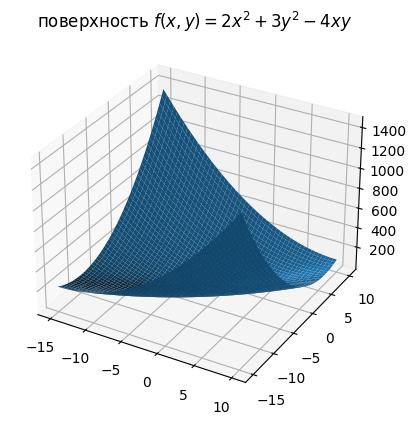

In [6]:
A = np.array([[2, -2], [-2, 3]])

t = np.linspace(-15, 10, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), A))
plt.title("поверхность $f(x, y) = 2x^2+3y^2-4xy$")
plt.show()

[[-7.         10.        ]
 [-4.28        6.48      ]
 [-2.5584      4.24      ]
 [-1.470656    2.813056  ]
 [-0.78526208  1.9026176 ]
 [-0.35520133  1.32034744]
 [-0.08711353  0.94663184]
 [ 0.07828573  0.70550204]
 [ 0.17864034  0.54870727]
 [ 0.23785105  0.44559998]
 [ 0.27109088  0.37671215]
 [ 0.28799028  0.32967577]
 [ 0.29465996  0.29663203]
 [ 0.29497549  0.27258594]
 [ 0.29139316  0.25436139]
 [ 0.28546808  0.23993756]
 [ 0.2781832   0.22802744]
 [ 0.27015828  0.21781017]
 [ 0.26178258  0.20876105]
 [ 0.25329913  0.20054361]
 [ 0.24485825  0.19294101]
 [ 0.23655149  0.18581248]
 [ 0.22843325  0.17906573]
 [ 0.22053445  0.17263927]
 [ 0.21287122  0.16649136]
 [ 0.20545044  0.16059283]
 [ 0.19827322  0.15492262]
 [ 0.19133713  0.14946491]
 [ 0.18463757  0.14420727]
 [ 0.17816872  0.13913954]
 [ 0.17192405  0.13425304]
 [ 0.16589669  0.12954016]
 [ 0.16007965  0.12499399]
 [ 0.15446594  0.12060818]
 [ 0.1490487   0.11637677]
 [ 0.14382119  0.11229413]
 [ 0.13877686  0.10835493]
 

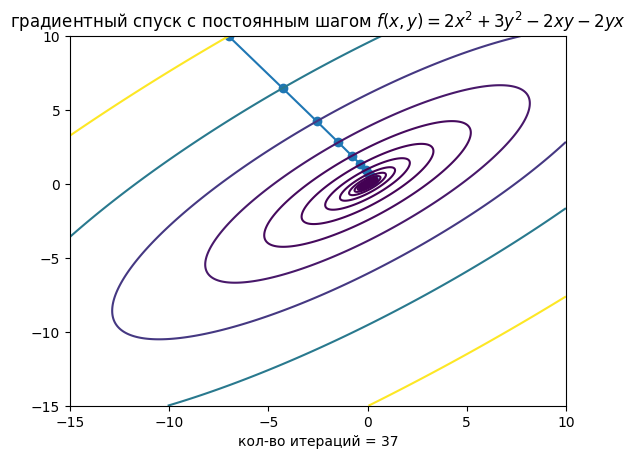

In [7]:
grad_counter = 0
func_counter = 0

start_points = [-7, 10]
points = gradient_constant_move(A, 0.04, start_points, 0.001)
print(points)

print("func_counter = ", func_counter)
print("grad_counter = ", grad_counter)
t = np.linspace(-15, 10, 1000)
X, Y = np.meshgrid(t, t)
plt.plot(np.array(points)[:, 0], np.array(points)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in points]))
plt.title("градиентный спуск с постоянным шагом $f(x, y) = 2x^2+3y^2-2xy-2yx$")
plt.xlabel("кол-во итераций = {}".format(len(points) - 1))
plt.show()

[[-7.00000000e+00  1.00000000e+01]
 [ 4.49951172e-01  3.58886719e-01]
 [ 7.52218366e-02 -4.79161739e-03]
 [ 3.97666562e-02  3.17251823e-02]
 [ 6.73496744e-03 -4.01355612e-04]
 [ 3.57275398e-03  2.84978124e-03]]
func_counter =  156
grad_counter =  5


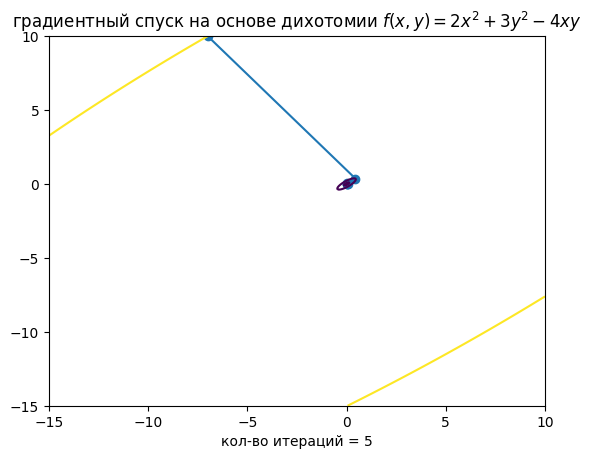

In [8]:
grad_counter = 0
func_counter = 0
coords = gradient_descent(A, f, grad, start_points, np.array([20, 20]), 0.001)
coords = np.array(coords)
print(coords)

print("func_counter = ", func_counter)
print("grad_counter = ", grad_counter)
plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("градиентный спуск на основе дихотомии $f(x, y) = 2x^2+3y^2-4xy$")
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

# $f(x, y) = x^2+y^2$

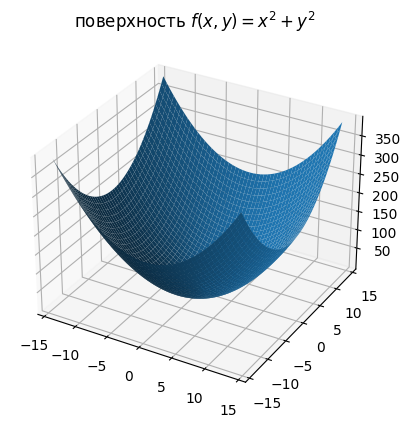

In [10]:
A = np.array([[1, 0], [0, 1]])

t = np.linspace(-14, 14, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f((X, Y), A))
plt.title("поверхность $f(x, y) = x^2+y^2$")
plt.show()

[[10.          7.        ]
 [ 9.2         6.44      ]
 [ 8.464       5.9248    ]
 [ 7.78688     5.450816  ]
 [ 7.1639296   5.01475072]
 [ 6.59081523  4.61357066]
 [ 6.06355001  4.24448501]
 [ 5.57846601  3.90492621]
 [ 5.13218873  3.59253211]
 [ 4.72161363  3.30512954]
 [ 4.34388454  3.04071918]
 [ 3.99637378  2.79746165]
 [ 3.67666388  2.57366471]
 [ 3.38253077  2.36777154]
 [ 3.11192831  2.17834981]
 [ 2.86297404  2.00408183]
 [ 2.63393612  1.84375528]
 [ 2.42322123  1.69625486]
 [ 2.22936353  1.56055447]
 [ 2.05101445  1.43571011]
 [ 1.88693329  1.3208533 ]
 [ 1.73597863  1.21518504]
 [ 1.59710034  1.11797024]
 [ 1.46933231  1.02853262]
 [ 1.35178573  0.94625001]
 [ 1.24364287  0.87055001]
 [ 1.14415144  0.80090601]
 [ 1.05261932  0.73683353]
 [ 0.96840978  0.67788684]
 [ 0.890937    0.6236559 ]
 [ 0.81966204  0.57376343]
 [ 0.75408907  0.52786235]
 [ 0.69376195  0.48563336]
 [ 0.63826099  0.44678269]
 [ 0.58720011  0.41104008]
 [ 0.5402241   0.37815687]
 [ 0.49700617  0.34790432]
 

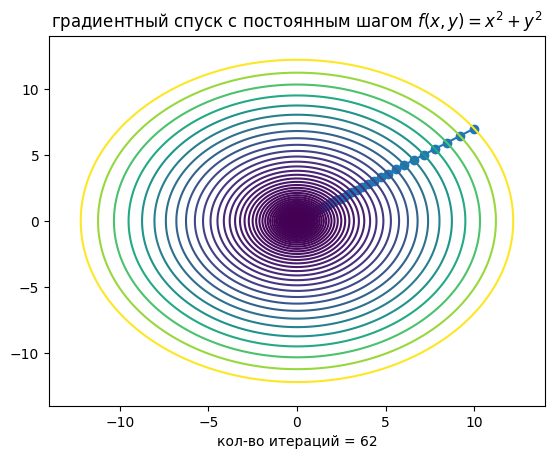

In [11]:
points = gradient_constant_move(A, 0.04, [10, 7], 0.001)
print(points)

plt.plot(np.array(points)[:, 0], np.array(points)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in points]))
plt.title("градиентный спуск с постоянным шагом $f(x, y) = x^2+y^2$")
plt.xlabel("кол-во итераций = {}".format(len(points) - 1))
plt.show()

[[ 1.00000000e+01  7.00000000e+00]
 [-3.66210938e-03 -2.56347656e-03]
 [ 1.34110451e-06  9.38773155e-07]]
func_counter =  63
grad_counter =  2


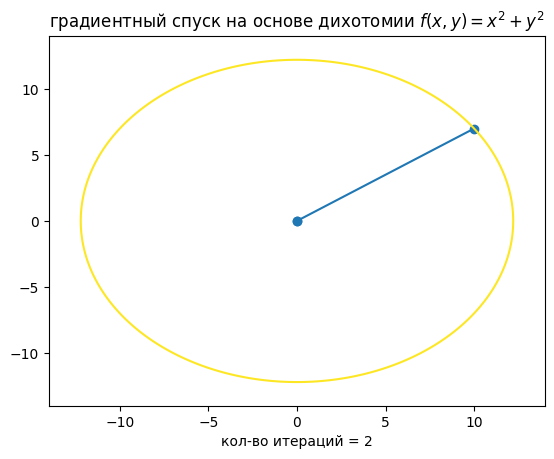

In [12]:
grad_counter = 0
func_counter = 0

coords = gradient_descent(A, f, grad, [10, 7], 20, 0.001)
coords = np.array(coords)
print(coords)
print("func_counter = ", func_counter)
print("grad_counter = ", grad_counter)

plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("градиентный спуск на основе дихотомии $f(x, y) = x^2+y^2$")
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

# $f(x, y) = 2x^2+3y^2-4xy$
## Анализ относительно стартовой точки

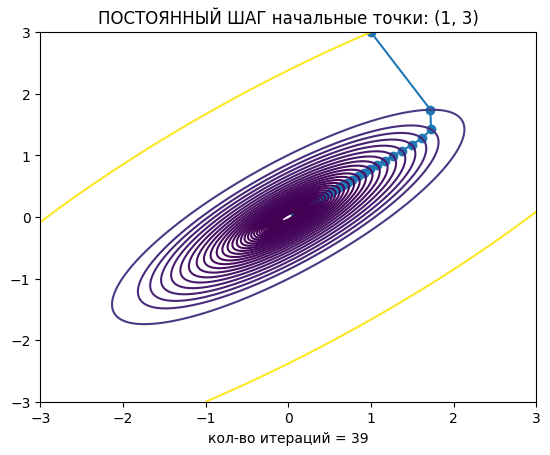

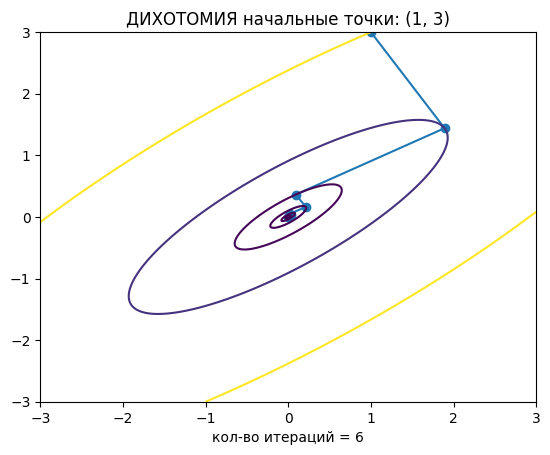

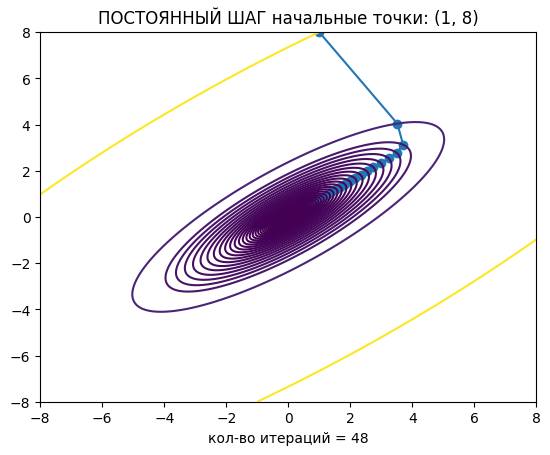

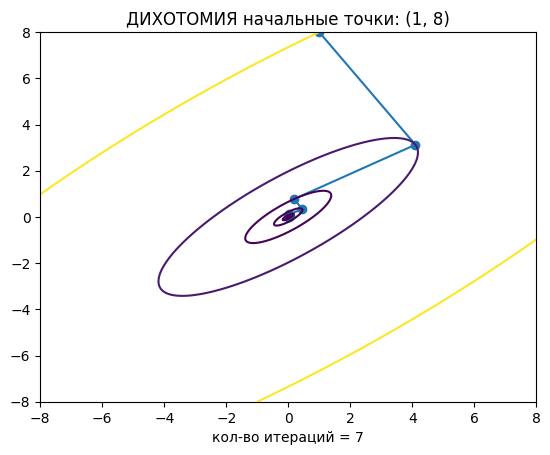

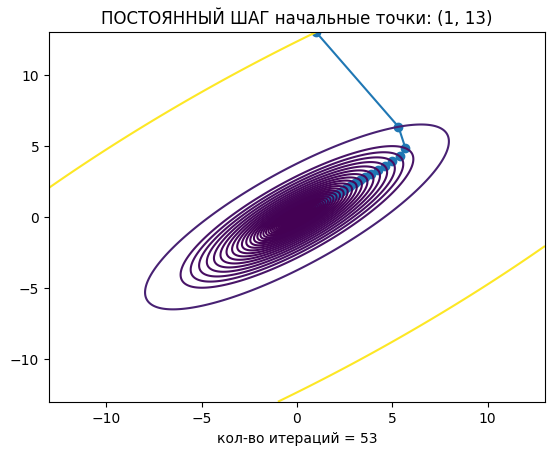

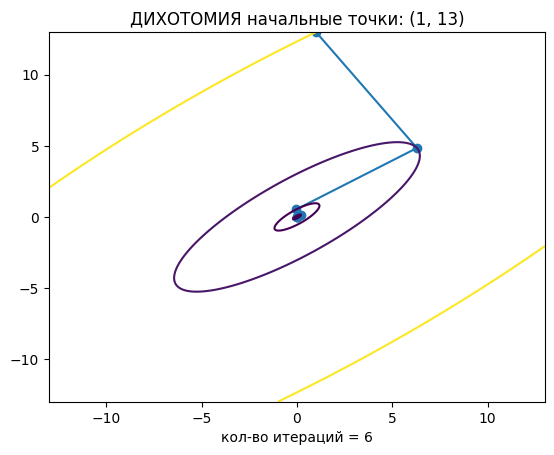

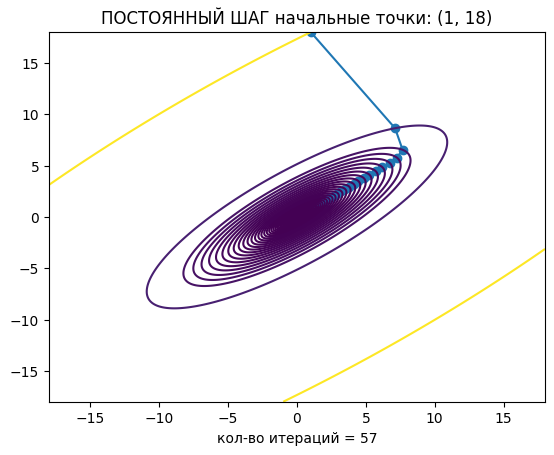

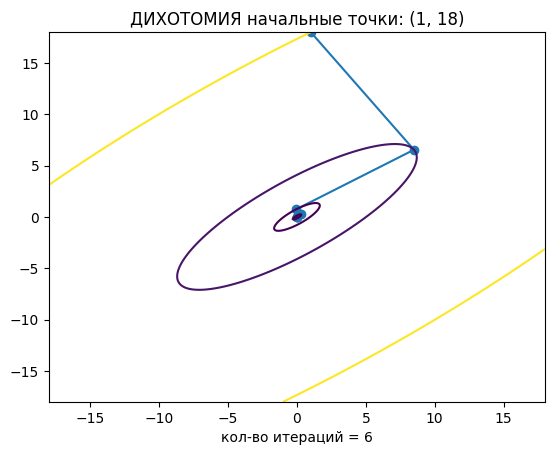

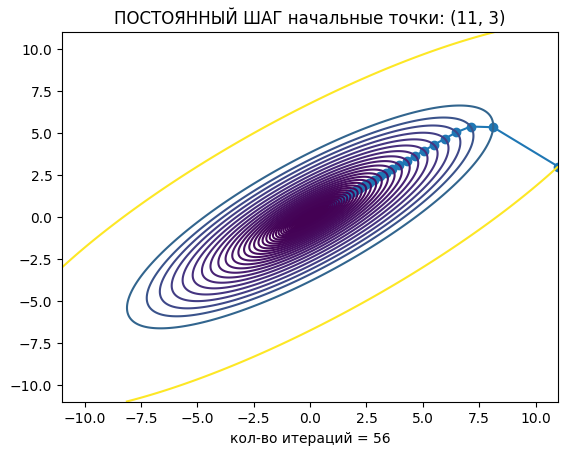

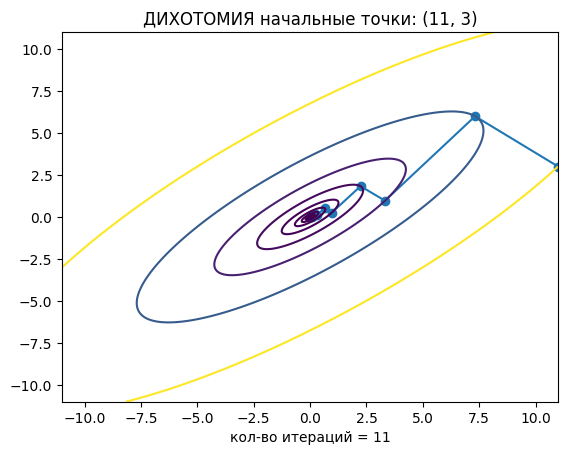

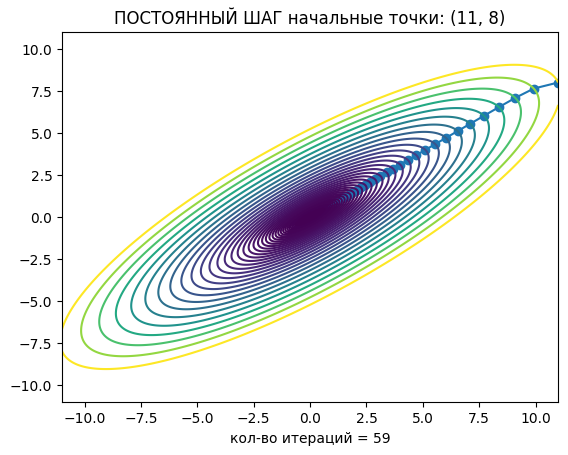

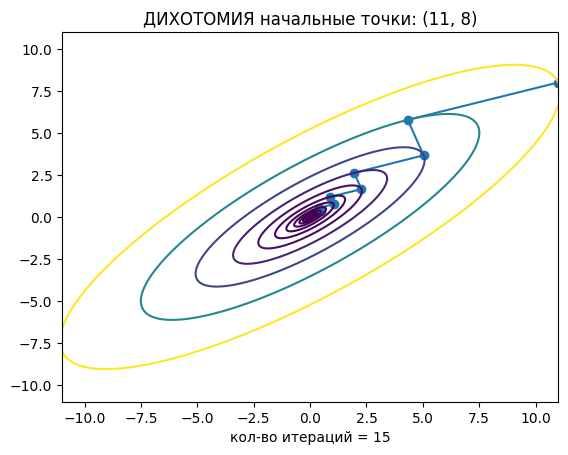

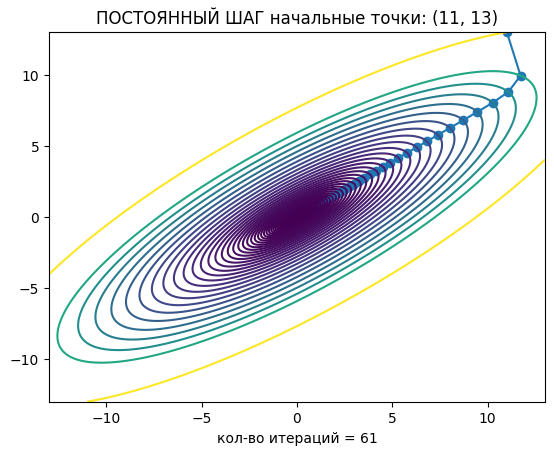

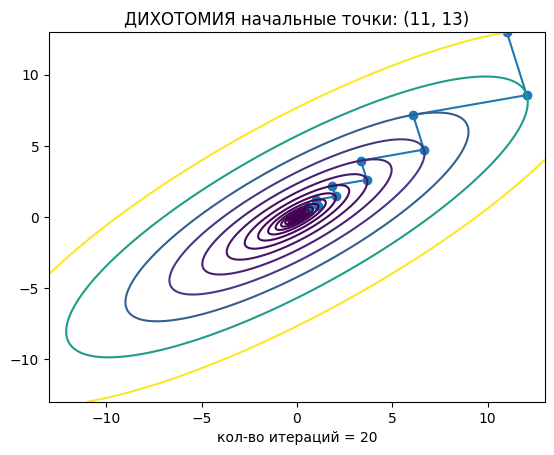

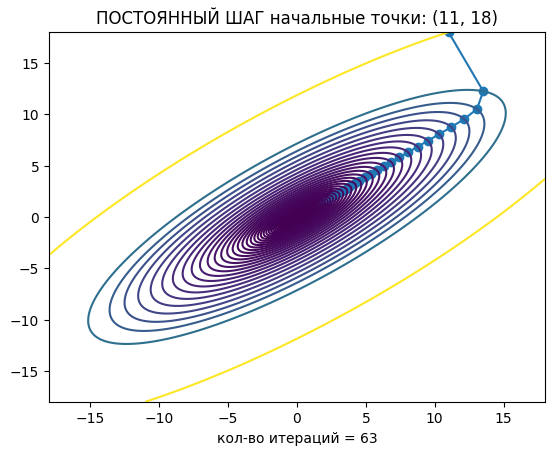

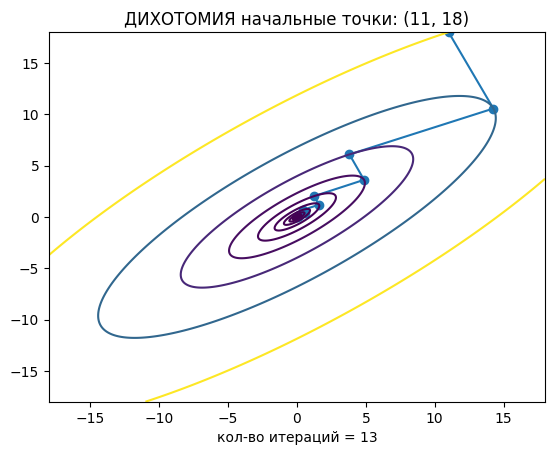

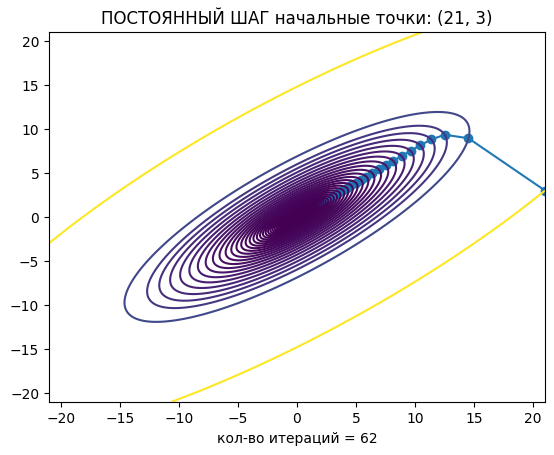

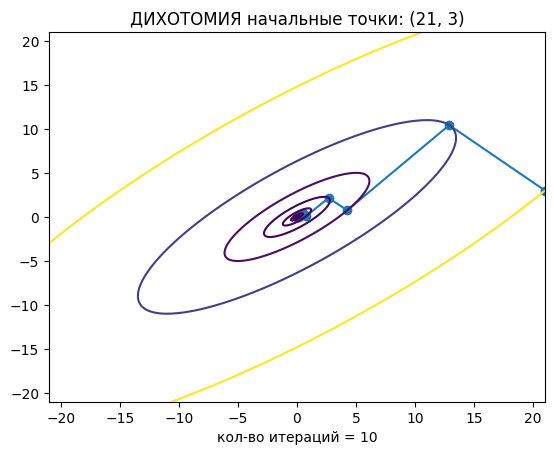

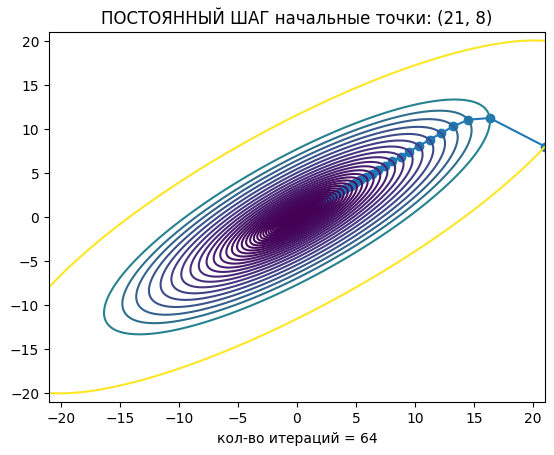

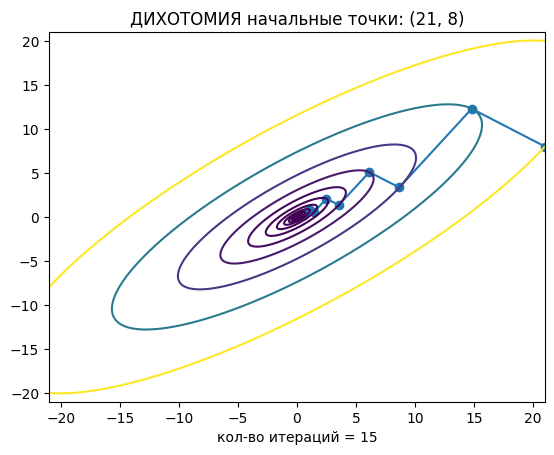

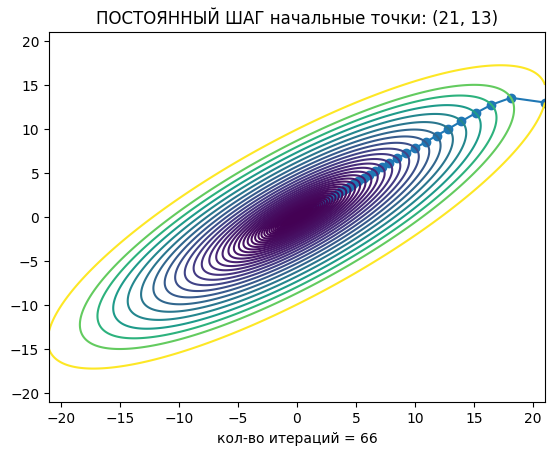

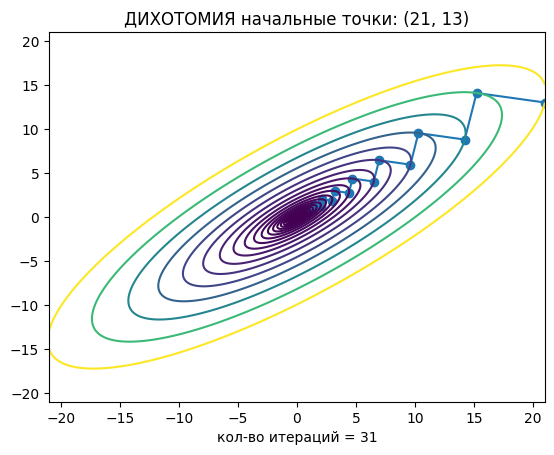

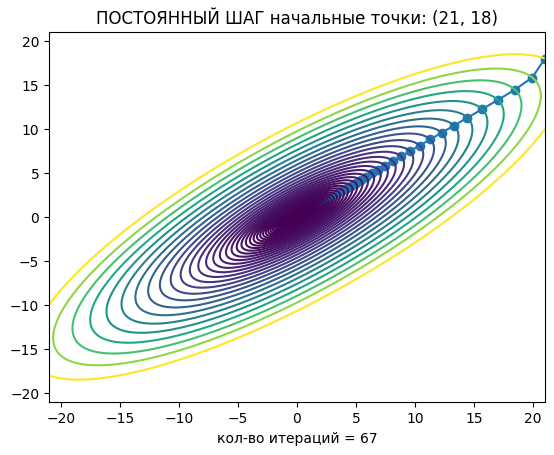

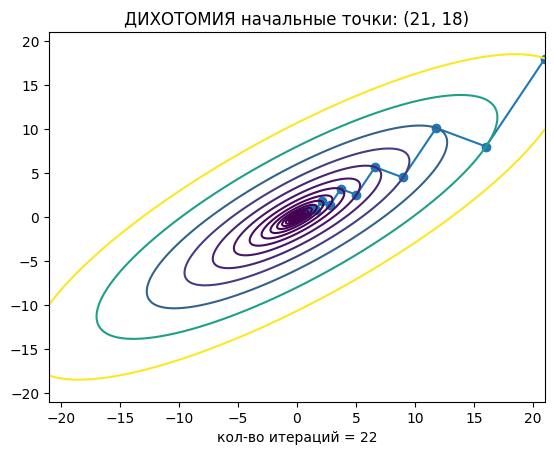

In [13]:
A = np.array([[2, -2], [-2, 3]])
for i in range(1, 31, 10):
    for j in range(3, 23, 5):
        if i < j:
            t = np.linspace(-j, j, 1000)
        else:
            t = np.linspace(-i, i, 1000)
        X, Y = np.meshgrid(t, t)
        points = gradient_constant_move(A, 0.09, [i, j], 0.001)
        plt.plot(np.array(points)[:, 0], np.array(points)[:, 1], 'o-')
        plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in points]))
        plt.title("ПОСТОЯННЫЙ ШАГ начальные точки: ({}, {})".format(i, j))
        plt.xlabel("кол-во итераций = {}".format(len(points) - 1))
        plt.show()
        coords = gradient_descent(A, f, grad, [i, j], 20, 0.001)
        plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
        plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
        plt.title("ДИХОТОМИЯ начальные точки: ({}, {})".format(i, j))
        plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
        plt.show()

# $f(x, y) = 100x^2 + y^2$
## Исследуйте влияние нормализации (scaling) на сходимость на примере масштабирования осей плохо обусловленной функции

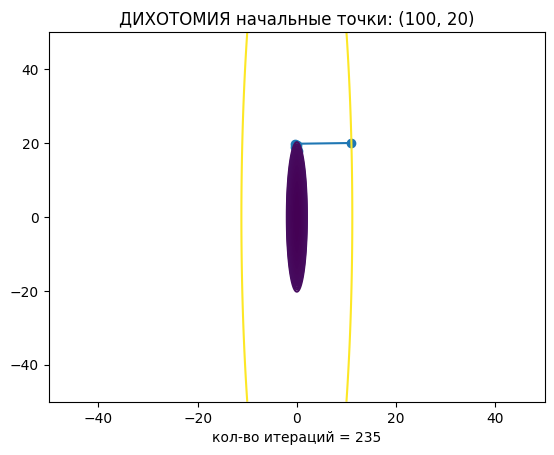

In [14]:
A = np.array([[100, 0], [0, 1]])
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
coords = gradient_descent(A, f, grad, [11, 20], 20, 0.001)
plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("ДИХОТОМИЯ начальные точки: ({}, {})".format(100, 20))
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

# $f(x, y) = x^2 + y^2 - $ масштабируем $f(x, y) = 100x^2 + y^2$

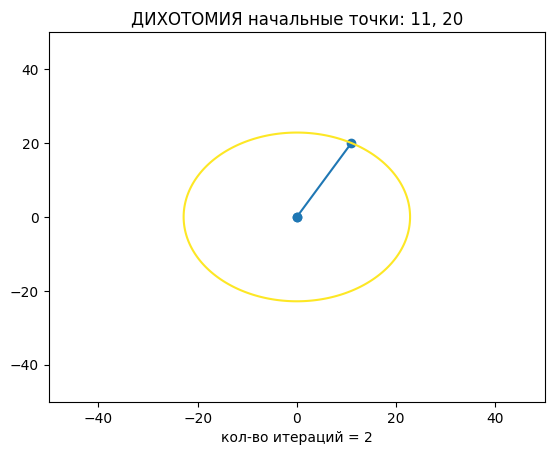

In [15]:
A = np.array([[1, 0], [0, 1]])
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
coords = gradient_descent(A, f, grad, [11, 20], 20, 0.001)
plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("ДИХОТОМИЯ начальные точки: {}, {}".format(11, 20))
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

## Исследуйте зависимость числа итераций $T(n,k)$, необходимых градиентному спуску для сходимости в зависимости от размерности пространства $2 ⩽ n ⩽ 10^3$ и числа обусловленности оптимизируемой функции $1 ⩽ k ⩽ 10^3$.

В файле "experiment_results.txt" собраны результаты эксперимента = усредненное кол-во итераций для каждой функции.
Эксперимент был проведен с помощью градиентного спуска на основе дихотомии.

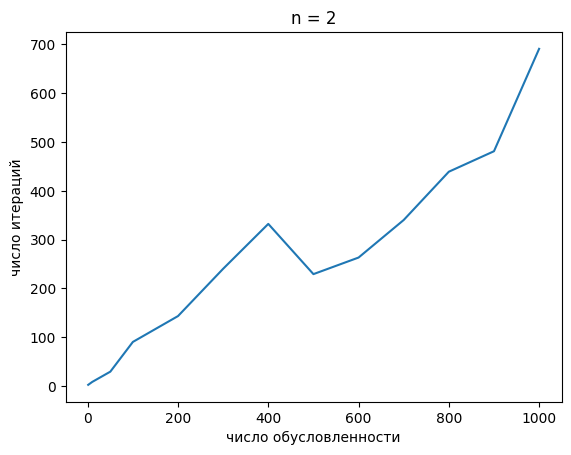

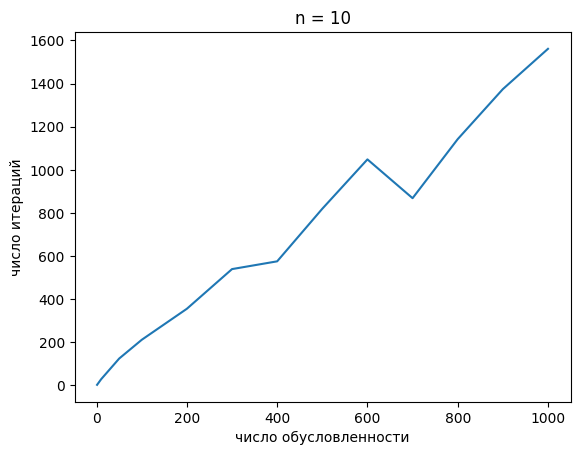

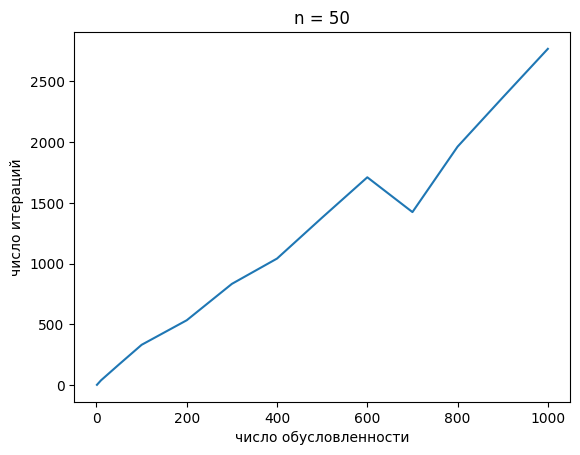

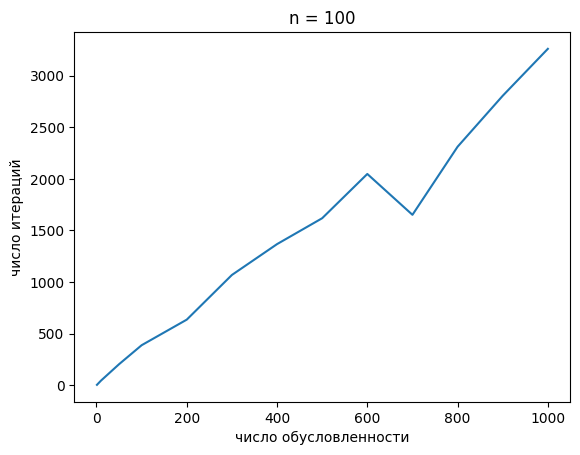

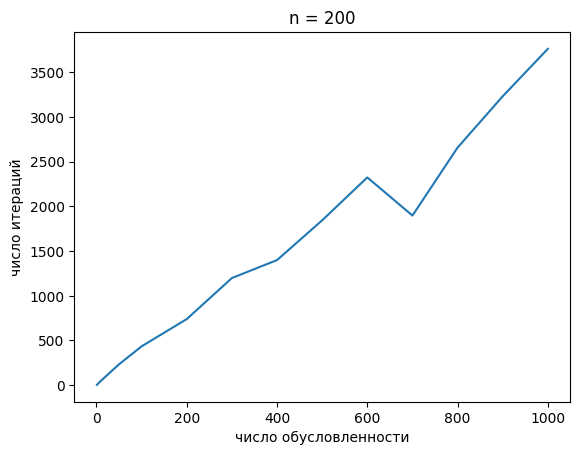

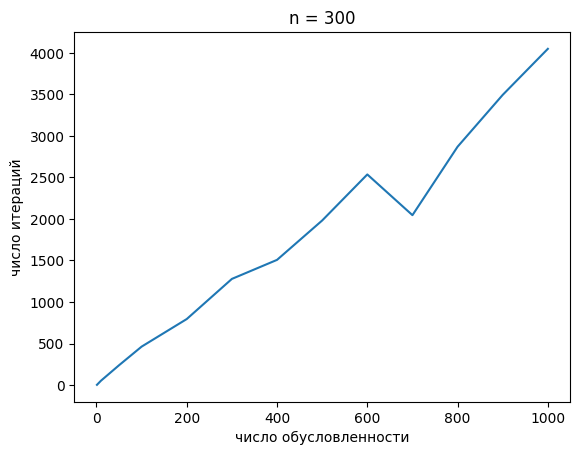

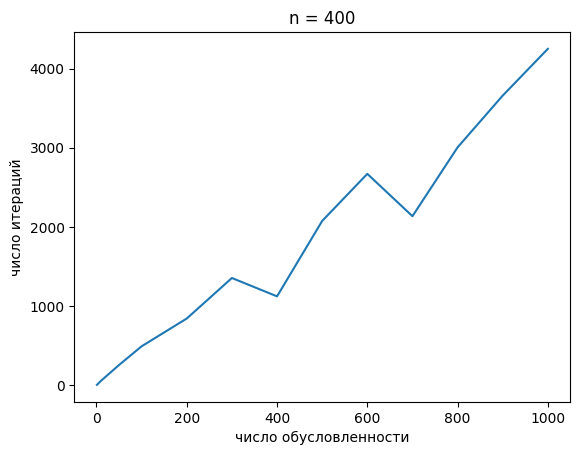

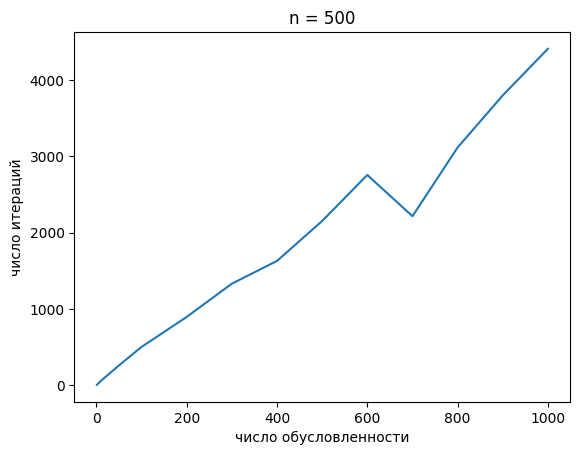

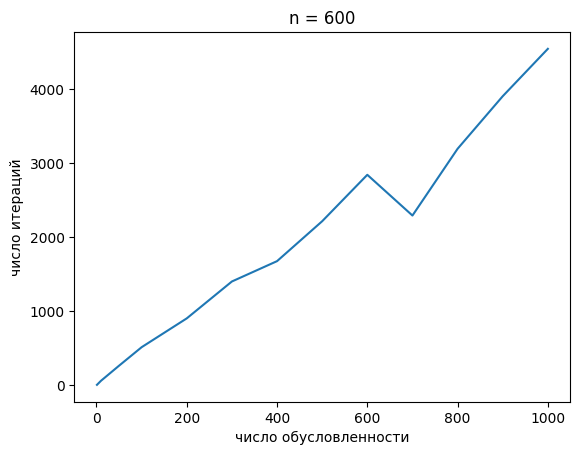

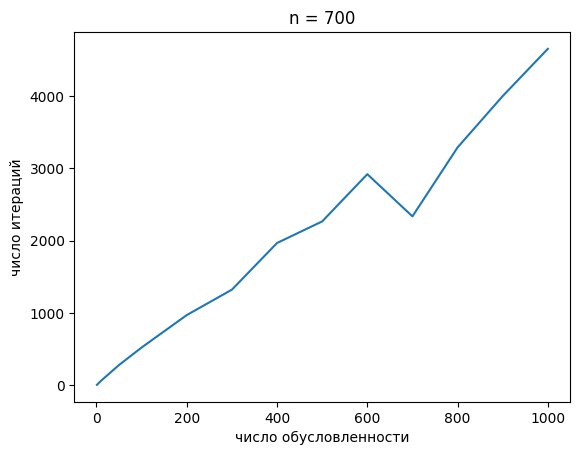

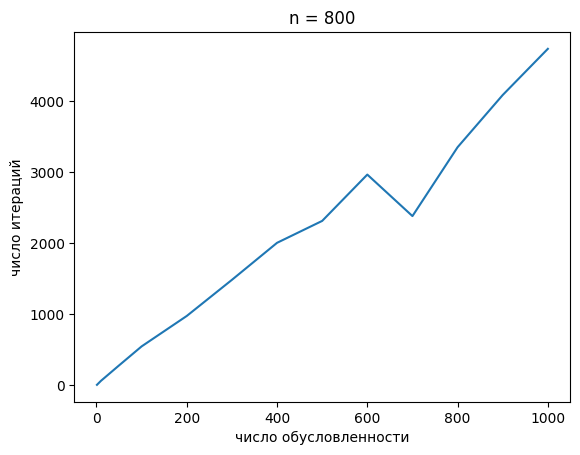

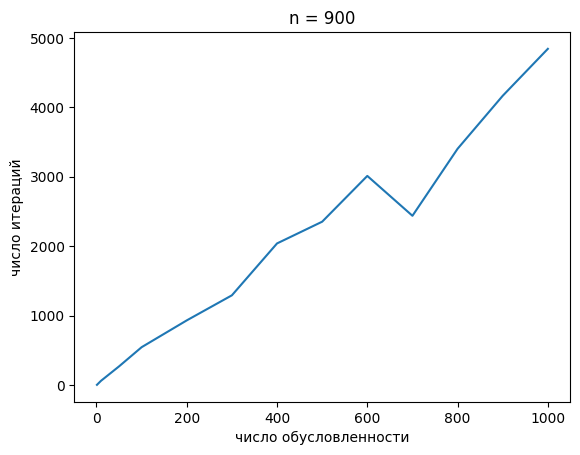

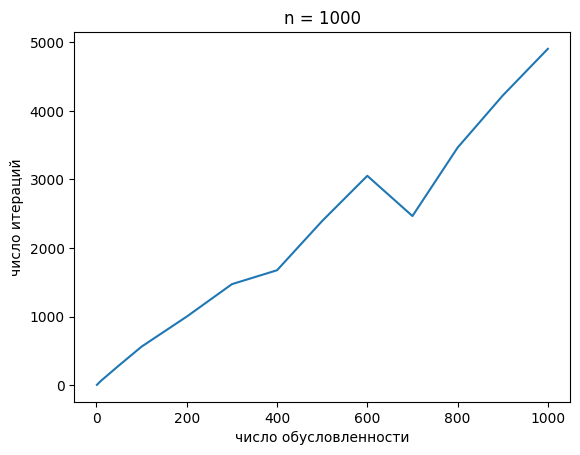

In [16]:
experiment_results = open("experiment_results.txt", "r")
n = [2, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
k = [1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for i in range(13):
    epoch = []
    for j in range(13):
        line = experiment_results.readline().replace("\n", " ")
        epoch.append(int(line.split(" ")[2]))
    plt.plot(k, epoch)
    plt.title("n = {}".format(n[i]))
    plt.xlabel("число обусловленности")
    plt.ylabel("число итераций")
    plt.show()

Одномерный поиск с учетом условий Вольфе

In [17]:
def wolfe_checker(A, xk, alpha, c1 = 10e-4, c2 = 0.9):
    xk = np.array(xk)
    curr_grad = grad(A, xk)
    curr_func = f(xk - alpha * curr_grad, A)
    if curr_func > f(xk, A) - c1 * alpha * (curr_grad @ curr_grad.T):
        return alpha / 2
    if (grad(A, xk - alpha * curr_grad).T @ curr_grad) * -1 < (curr_grad @ curr_grad.T) * -1 * c2:
        return alpha * 2
    return alpha


def gradient_decent_with_wolfe(A, alpha, curr_points, eps):
    all_points = [curr_points]
    i = 1
    while True:
        old_alpha = alpha
        alpha = wolfe_checker(A, all_points[i-1], alpha)
        if old_alpha == alpha:
            curr_points = curr_points - alpha * grad(A, all_points[i - 1])
            f_curr = f(np.array(curr_points), A)
            f_prev = f(np.array(all_points[i-1]), A)
            i += 1
            if abs(f_prev - f_curr) < eps:
                return np.array(all_points)
            all_points.append(curr_points)

[[1.00000000e+02 2.00000000e+01]
 [0.00000000e+00 1.98000000e+01]
 [0.00000000e+00 1.66320000e+01]
 [0.00000000e+00 1.39708800e+01]
 [0.00000000e+00 1.17355392e+01]
 [0.00000000e+00 9.85785293e+00]
 [0.00000000e+00 8.28059646e+00]
 [0.00000000e+00 6.95570103e+00]
 [0.00000000e+00 5.84278886e+00]
 [0.00000000e+00 4.90794264e+00]
 [0.00000000e+00 4.12267182e+00]
 [0.00000000e+00 3.46304433e+00]
 [0.00000000e+00 2.90895724e+00]
 [0.00000000e+00 2.44352408e+00]
 [0.00000000e+00 2.05256023e+00]
 [0.00000000e+00 1.72415059e+00]
 [0.00000000e+00 1.44828650e+00]
 [0.00000000e+00 1.21656066e+00]
 [0.00000000e+00 1.02191095e+00]
 [0.00000000e+00 8.58405199e-01]
 [0.00000000e+00 7.21060367e-01]
 [0.00000000e+00 6.05690709e-01]
 [0.00000000e+00 5.08780195e-01]
 [0.00000000e+00 4.27375364e-01]
 [0.00000000e+00 3.58995306e-01]
 [0.00000000e+00 3.01556057e-01]
 [0.00000000e+00 2.53307088e-01]
 [0.00000000e+00 2.12777954e-01]
 [0.00000000e+00 1.78733481e-01]
 [0.00000000e+00 1.50136124e-01]
 [0.000000

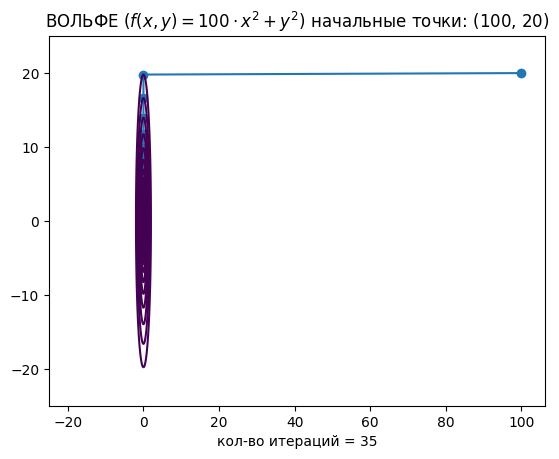

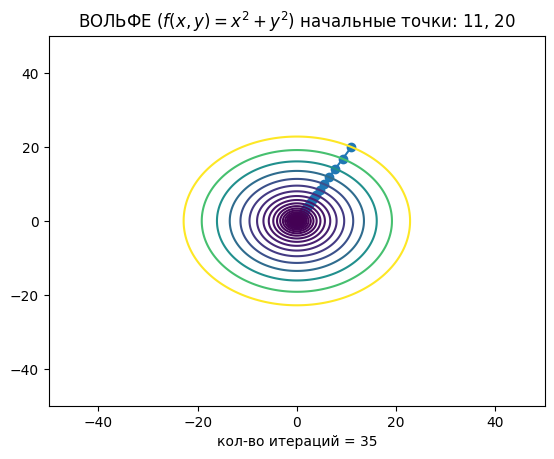

кол-во итераций для функции от 10 переменных с 700 числом обусловленности = 1076
кол-во итераций для функции от 700 переменных с 10 числом обусловленности = 79


In [18]:
A = np.array([[100, 0], [0, 1]])
t = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(t, t)
coords = gradient_decent_with_wolfe(A, 0.01, [100, 20], 0.001)
print(coords)

plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("ВОЛЬФЕ ($f(x, y) = 100 \cdot x^2 + y^2$) начальные точки: ({}, {})".format(100, 20))
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

A = np.array([[1, 0], [0, 1]])
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
coords = gradient_decent_with_wolfe(A, 0.01, [11, 20], 0.001)
plt.plot(np.array(coords)[:, 0], np.array(coords)[:, 1], 'o-')
plt.contour(X, Y, f((X, Y), A), levels=sorted([f([np.array(p[0]), np.array(p[1])], A) for p in coords]))
plt.title("ВОЛЬФЕ ($f(x, y) = x^2 + y^2$) начальные точки: {}, {}".format(11, 20))
plt.xlabel("кол-во итераций = {}".format(len(coords) - 1))
plt.show()

A = generate_func(10, 700)
coords = gradient_decent_with_wolfe(A, 0.01, np.arange(1, 11, 1), 0.001)
print("кол-во итераций для функции от 10 переменных с 700 числом обусловленности =", len(coords) - 1)

A = generate_func(700, 10)
coords = gradient_decent_with_wolfe(A, 0.01, np.arange(1, 701, 1), 0.001)
print("кол-во итераций для функции от 700 переменных с 10 числом обусловленности =", len(coords) - 1)